In [13]:
import boto3
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox

from precision_recall_cutoff import precision_recall_cutoff

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'ryan-greiner-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'predictive_analytics/turnover.csv'
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading CSV file
turnover = pd.read_csv(file_content_stream)
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
## Create dummies for salary and sales ##
turnover = pd.concat([turnover.drop(columns = ['sales', 'salary'], axis = 1), pd.get_dummies(turnover[['sales', 'salary']])], axis = 1)
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


[Text(0.5, 0.875, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(0.25, 0.625, 'number_project <= 2.5\ngini = 0.476\nsamples = 3321\nvalue = [1295, 2026]'),
 Text(0.125, 0.375, 'last_evaluation <= 0.575\ngini = 0.209\nsamples = 1383\nvalue = [164, 1219]'),
 Text(0.0625, 0.125, 'gini = 0.108\nsamples = 1288\nvalue = [74, 1214]'),
 Text(0.1875, 0.125, 'gini = 0.1\nsamples = 95\nvalue = [90, 5]'),
 Text(0.375, 0.375, 'satisfaction_level <= 0.115\ngini = 0.486\nsamples = 1938\nvalue = [1131, 807]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 718\nvalue = [0, 718]'),
 Text(0.4375, 0.125, 'gini = 0.135\nsamples = 1220\nvalue = [1131, 89]'),
 Text(0.75, 0.625, 'time_spend_company <= 4.5\ngini = 0.173\nsamples = 8678\nvalue = [7847, 831]'),
 Text(0.625, 0.375, 'average_montly_hours <= 290.5\ngini = 0.029\nsamples = 7086\nvalue = [6983, 103]'),
 Text(0.5625, 0.125, 'gini = 0.027\nsamples = 7079\nvalue = [6983, 96]'),
 Text(0.6875, 0.125, 'gini = 0.0\n

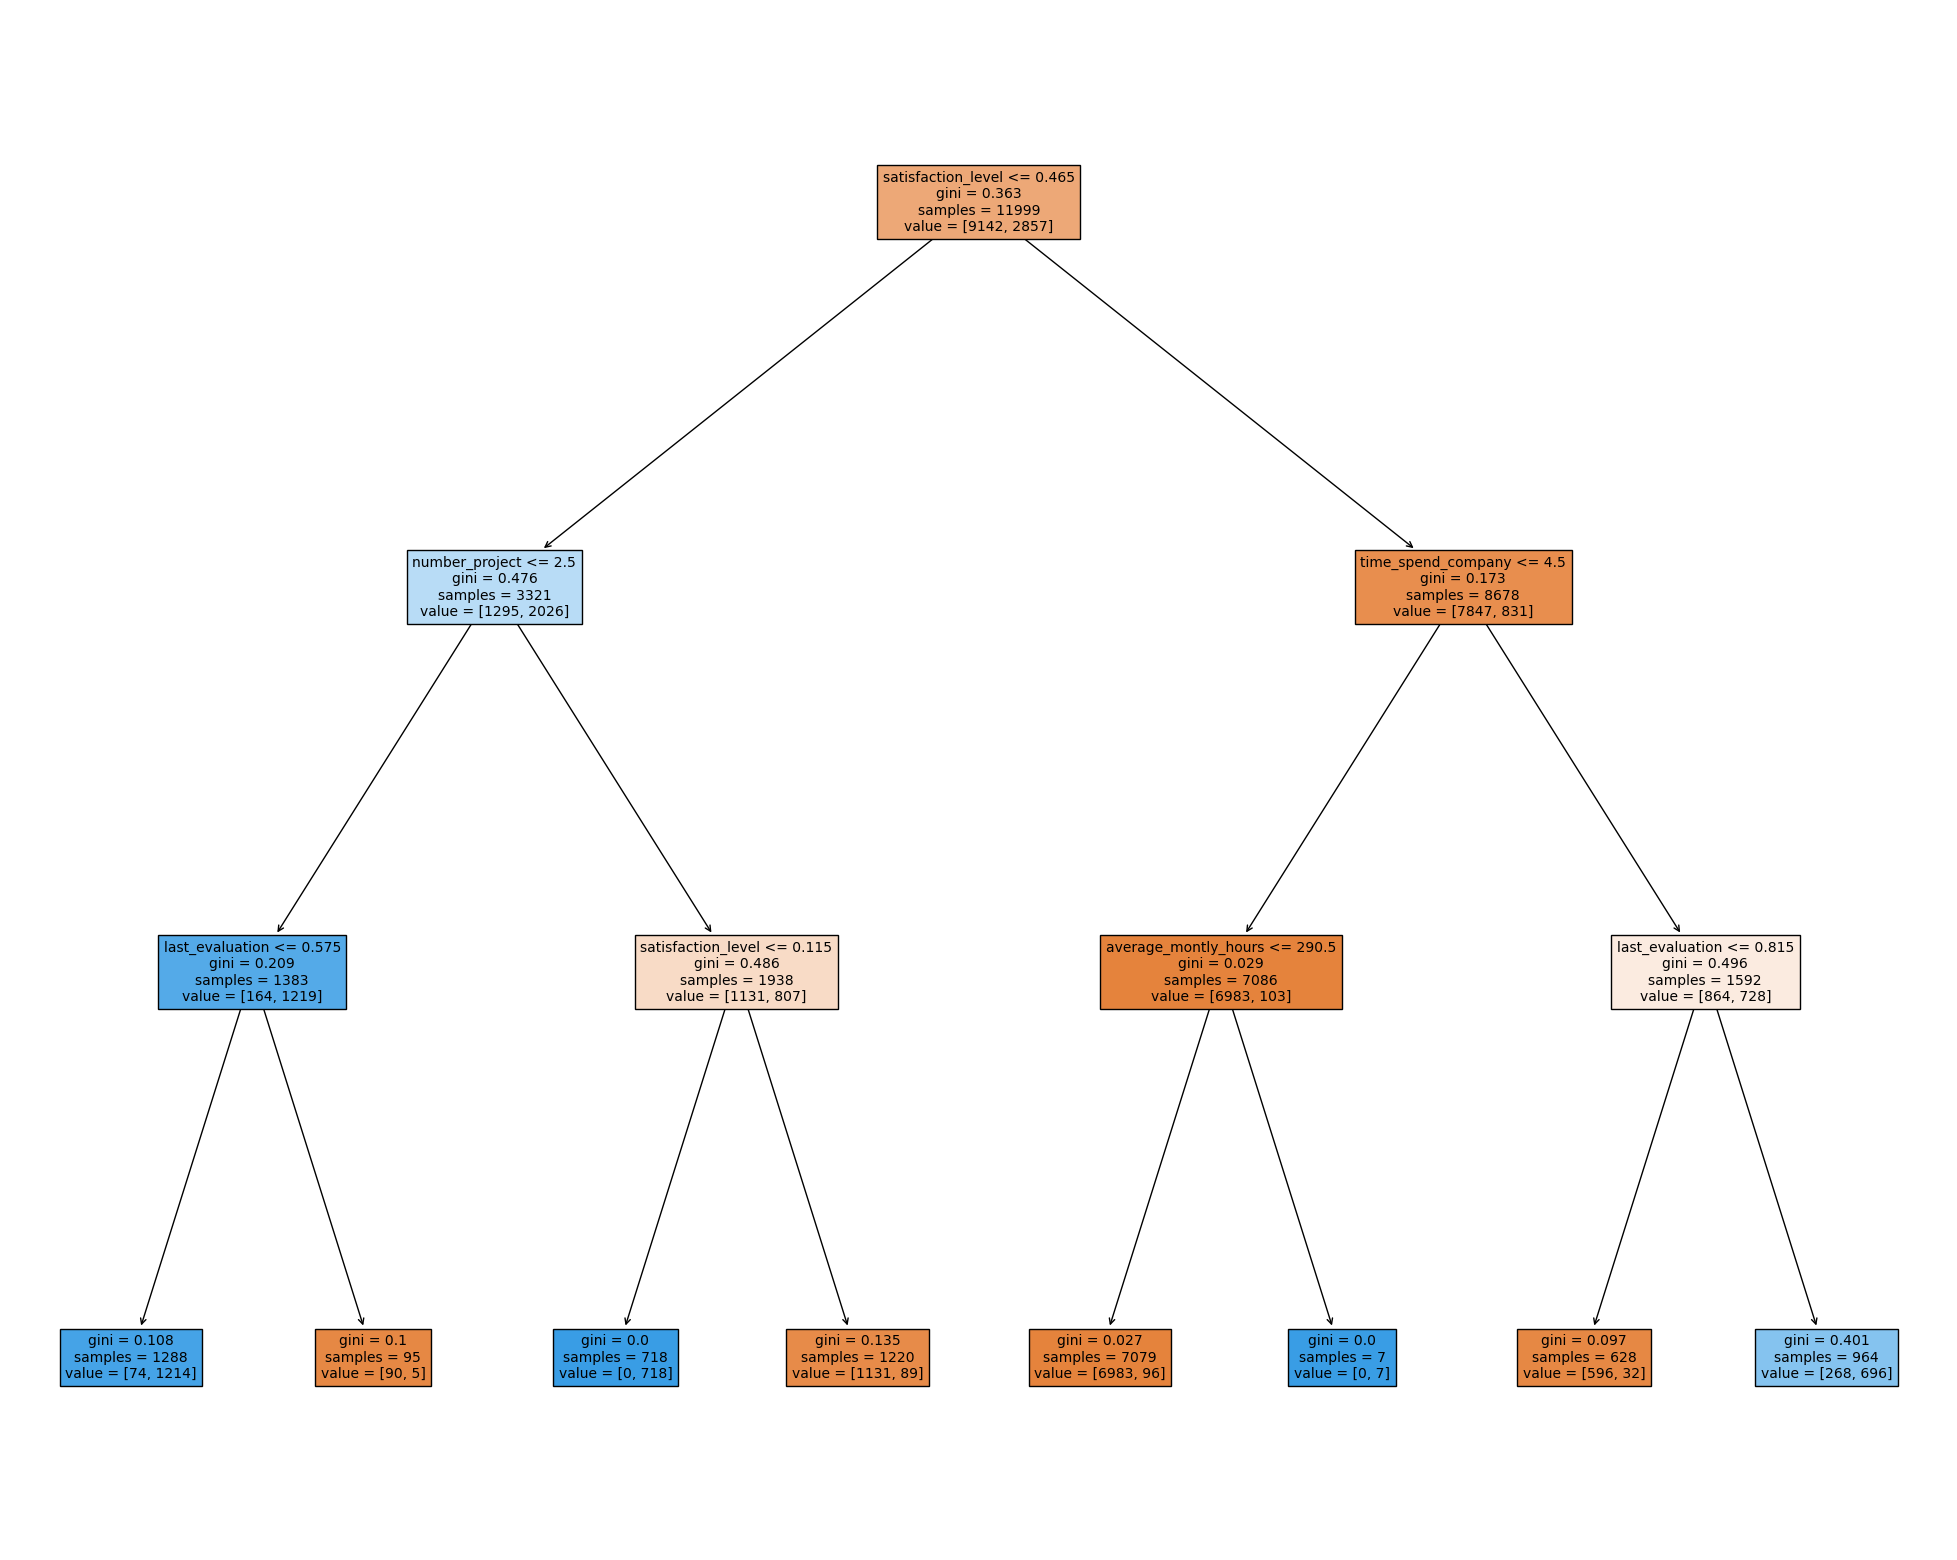

In [16]:
## Inputs and target ##
X = turnover.drop(columns = ['left'], axis = 1)
Y = turnover['left']

## Split Data ##
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, stratify = Y)

## decision tree ##
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X_train, Y_train)

fig = plt.figure(figsize = (25, 20))
plot_tree(tree_md, feature_names = X_train.columns, filled = True)

[Text(0.5, 0.875, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(0.25, 0.625, 'number_project <= 2.5\ngini = 0.477\nsamples = 3365\nvalue = [1324, 2041]'),
 Text(0.125, 0.375, 'last_evaluation <= 0.575\ngini = 0.215\nsamples = 1403\nvalue = [172, 1231]'),
 Text(0.0625, 0.125, 'gini = 0.111\nsamples = 1304\nvalue = [77, 1227]'),
 Text(0.1875, 0.125, 'gini = 0.078\nsamples = 99\nvalue = [95, 4]'),
 Text(0.375, 0.375, 'satisfaction_level <= 0.115\ngini = 0.485\nsamples = 1962\nvalue = [1152, 810]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 721\nvalue = [0, 721]'),
 Text(0.4375, 0.125, 'gini = 0.133\nsamples = 1241\nvalue = [1152, 89]'),
 Text(0.75, 0.625, 'time_spend_company <= 4.5\ngini = 0.171\nsamples = 8634\nvalue = [7818, 816]'),
 Text(0.625, 0.375, 'average_montly_hours <= 290.5\ngini = 0.029\nsamples = 7051\nvalue = [6949, 102]'),
 Text(0.5625, 0.125, 'gini = 0.027\nsamples = 7046\nvalue = [6949, 97]'),
 Text(0.6875, 0.125, 'gini = 0.0

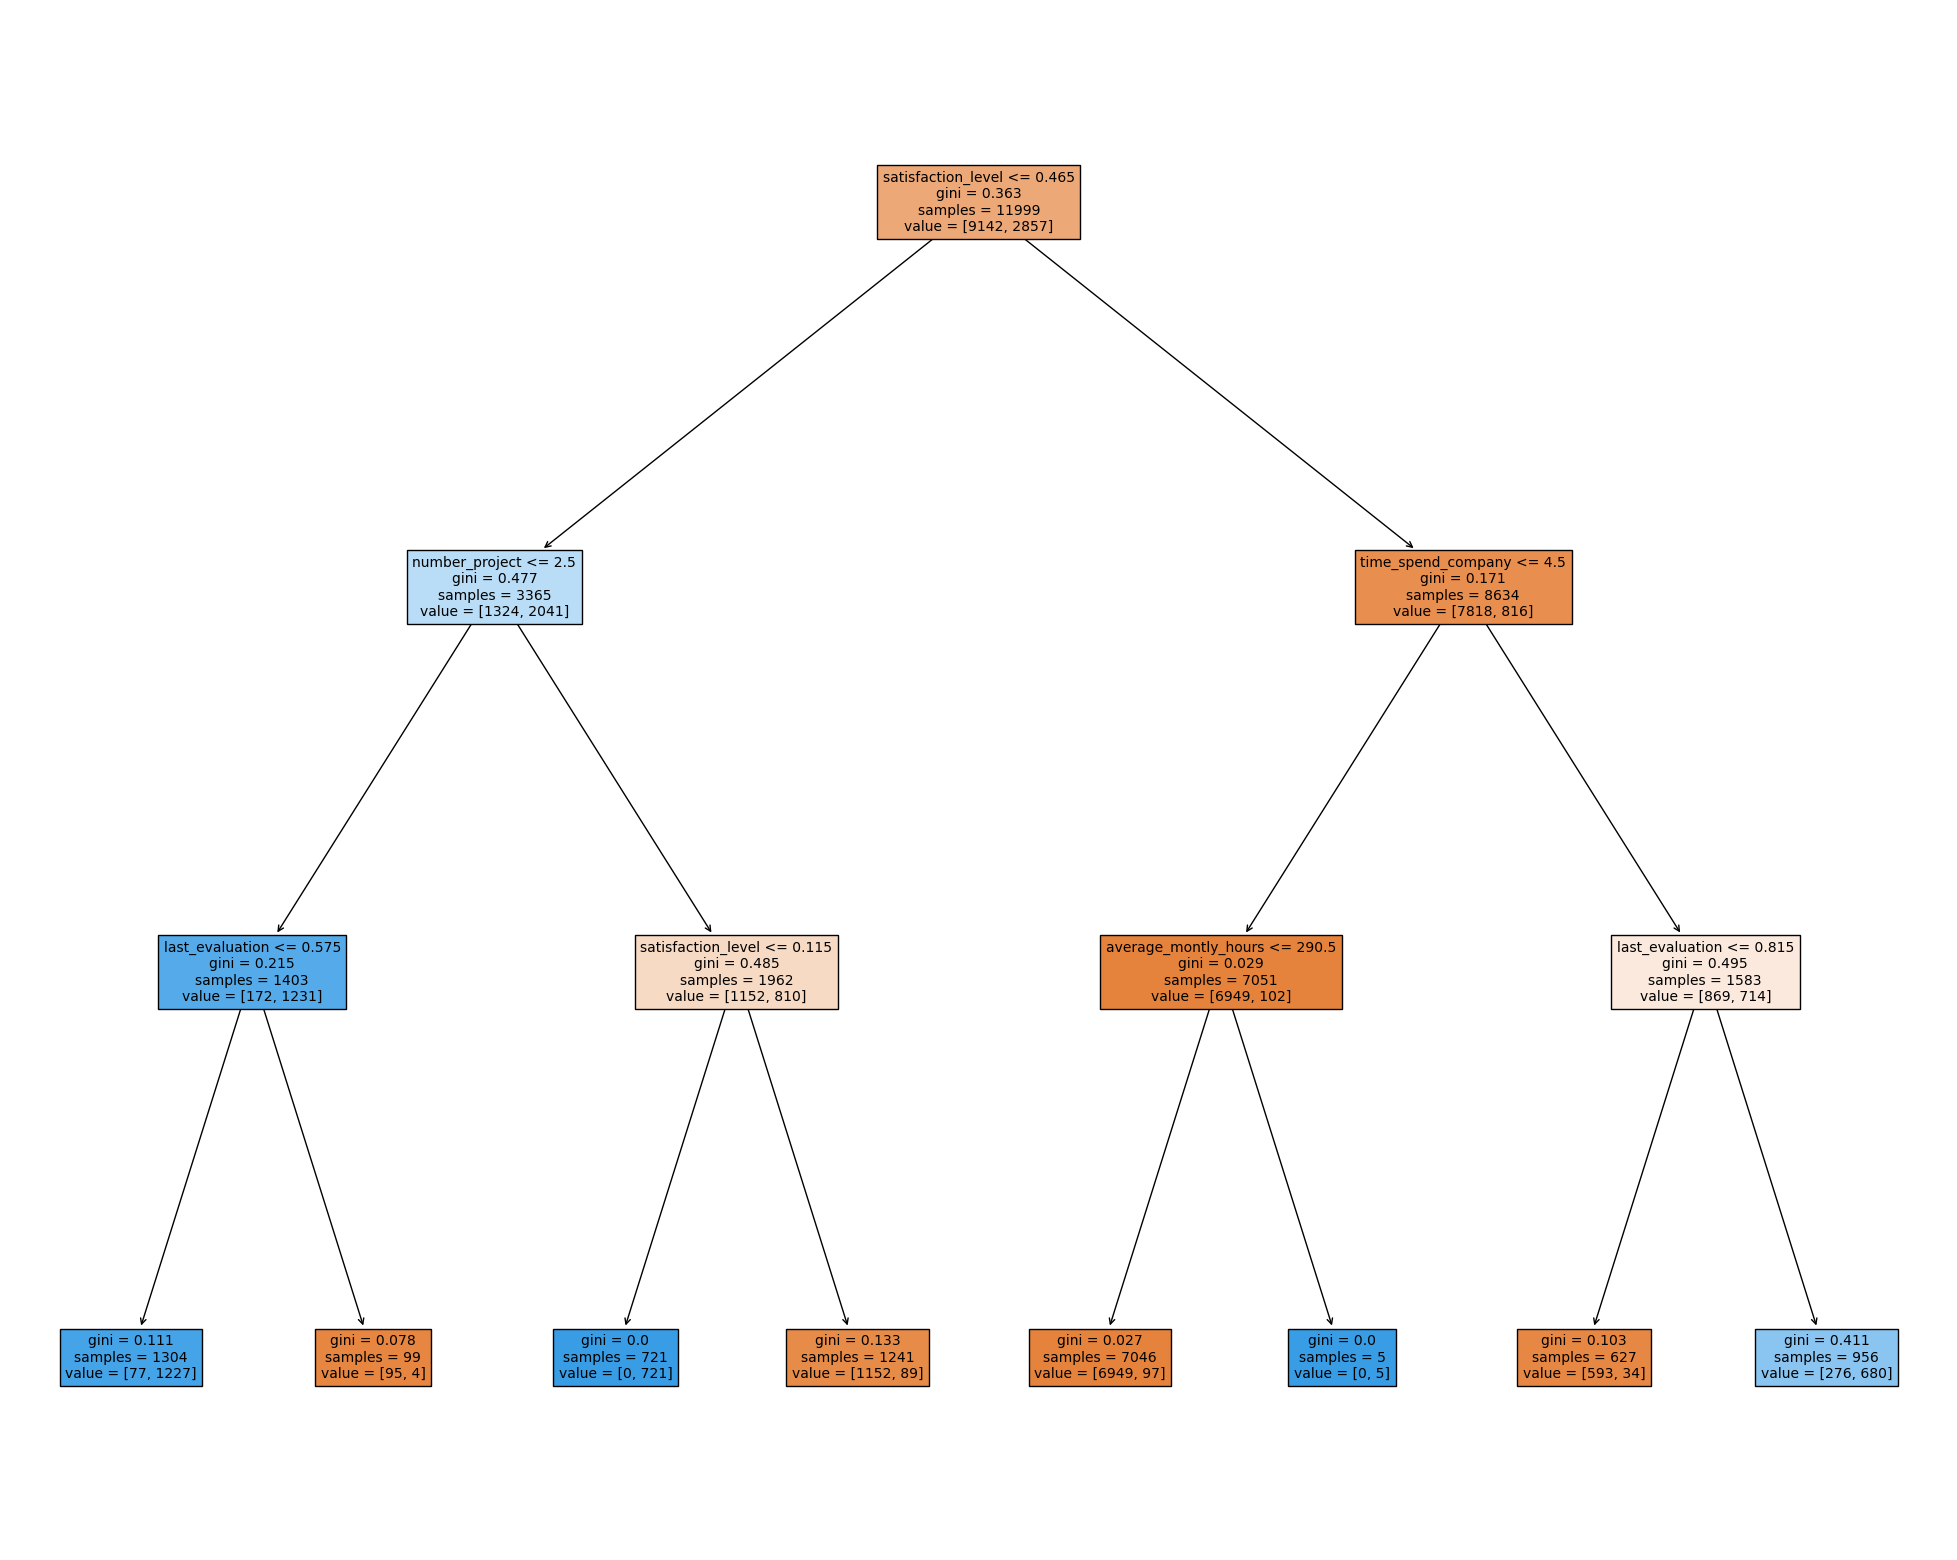

In [17]:
## Inputs and target ##
X = turnover.drop(columns = ['left'], axis = 1)
Y = turnover['left']

## Split Data ##
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, stratify = Y)

## decision tree ##
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X_train, Y_train)

fig = plt.figure(figsize = (25, 20))
plot_tree(tree_md, feature_names = X_train.columns, filled = True)

[Text(0.5, 0.875, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(0.25, 0.625, 'number_project <= 2.5\ngini = 0.477\nsamples = 3320\nvalue = [1307, 2013]'),
 Text(0.125, 0.375, 'last_evaluation <= 0.575\ngini = 0.216\nsamples = 1362\nvalue = [168, 1194]'),
 Text(0.0625, 0.125, 'gini = 0.106\nsamples = 1259\nvalue = [71, 1188]'),
 Text(0.1875, 0.125, 'gini = 0.11\nsamples = 103\nvalue = [97, 6]'),
 Text(0.375, 0.375, 'satisfaction_level <= 0.115\ngini = 0.487\nsamples = 1958\nvalue = [1139, 819]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 726\nvalue = [0, 726]'),
 Text(0.4375, 0.125, 'gini = 0.14\nsamples = 1232\nvalue = [1139, 93]'),
 Text(0.75, 0.625, 'time_spend_company <= 4.5\ngini = 0.176\nsamples = 8679\nvalue = [7835, 844]'),
 Text(0.625, 0.375, 'average_montly_hours <= 290.5\ngini = 0.029\nsamples = 7063\nvalue = [6960, 103]'),
 Text(0.5625, 0.125, 'gini = 0.027\nsamples = 7056\nvalue = [6960, 96]'),
 Text(0.6875, 0.125, 'gini = 0.0\

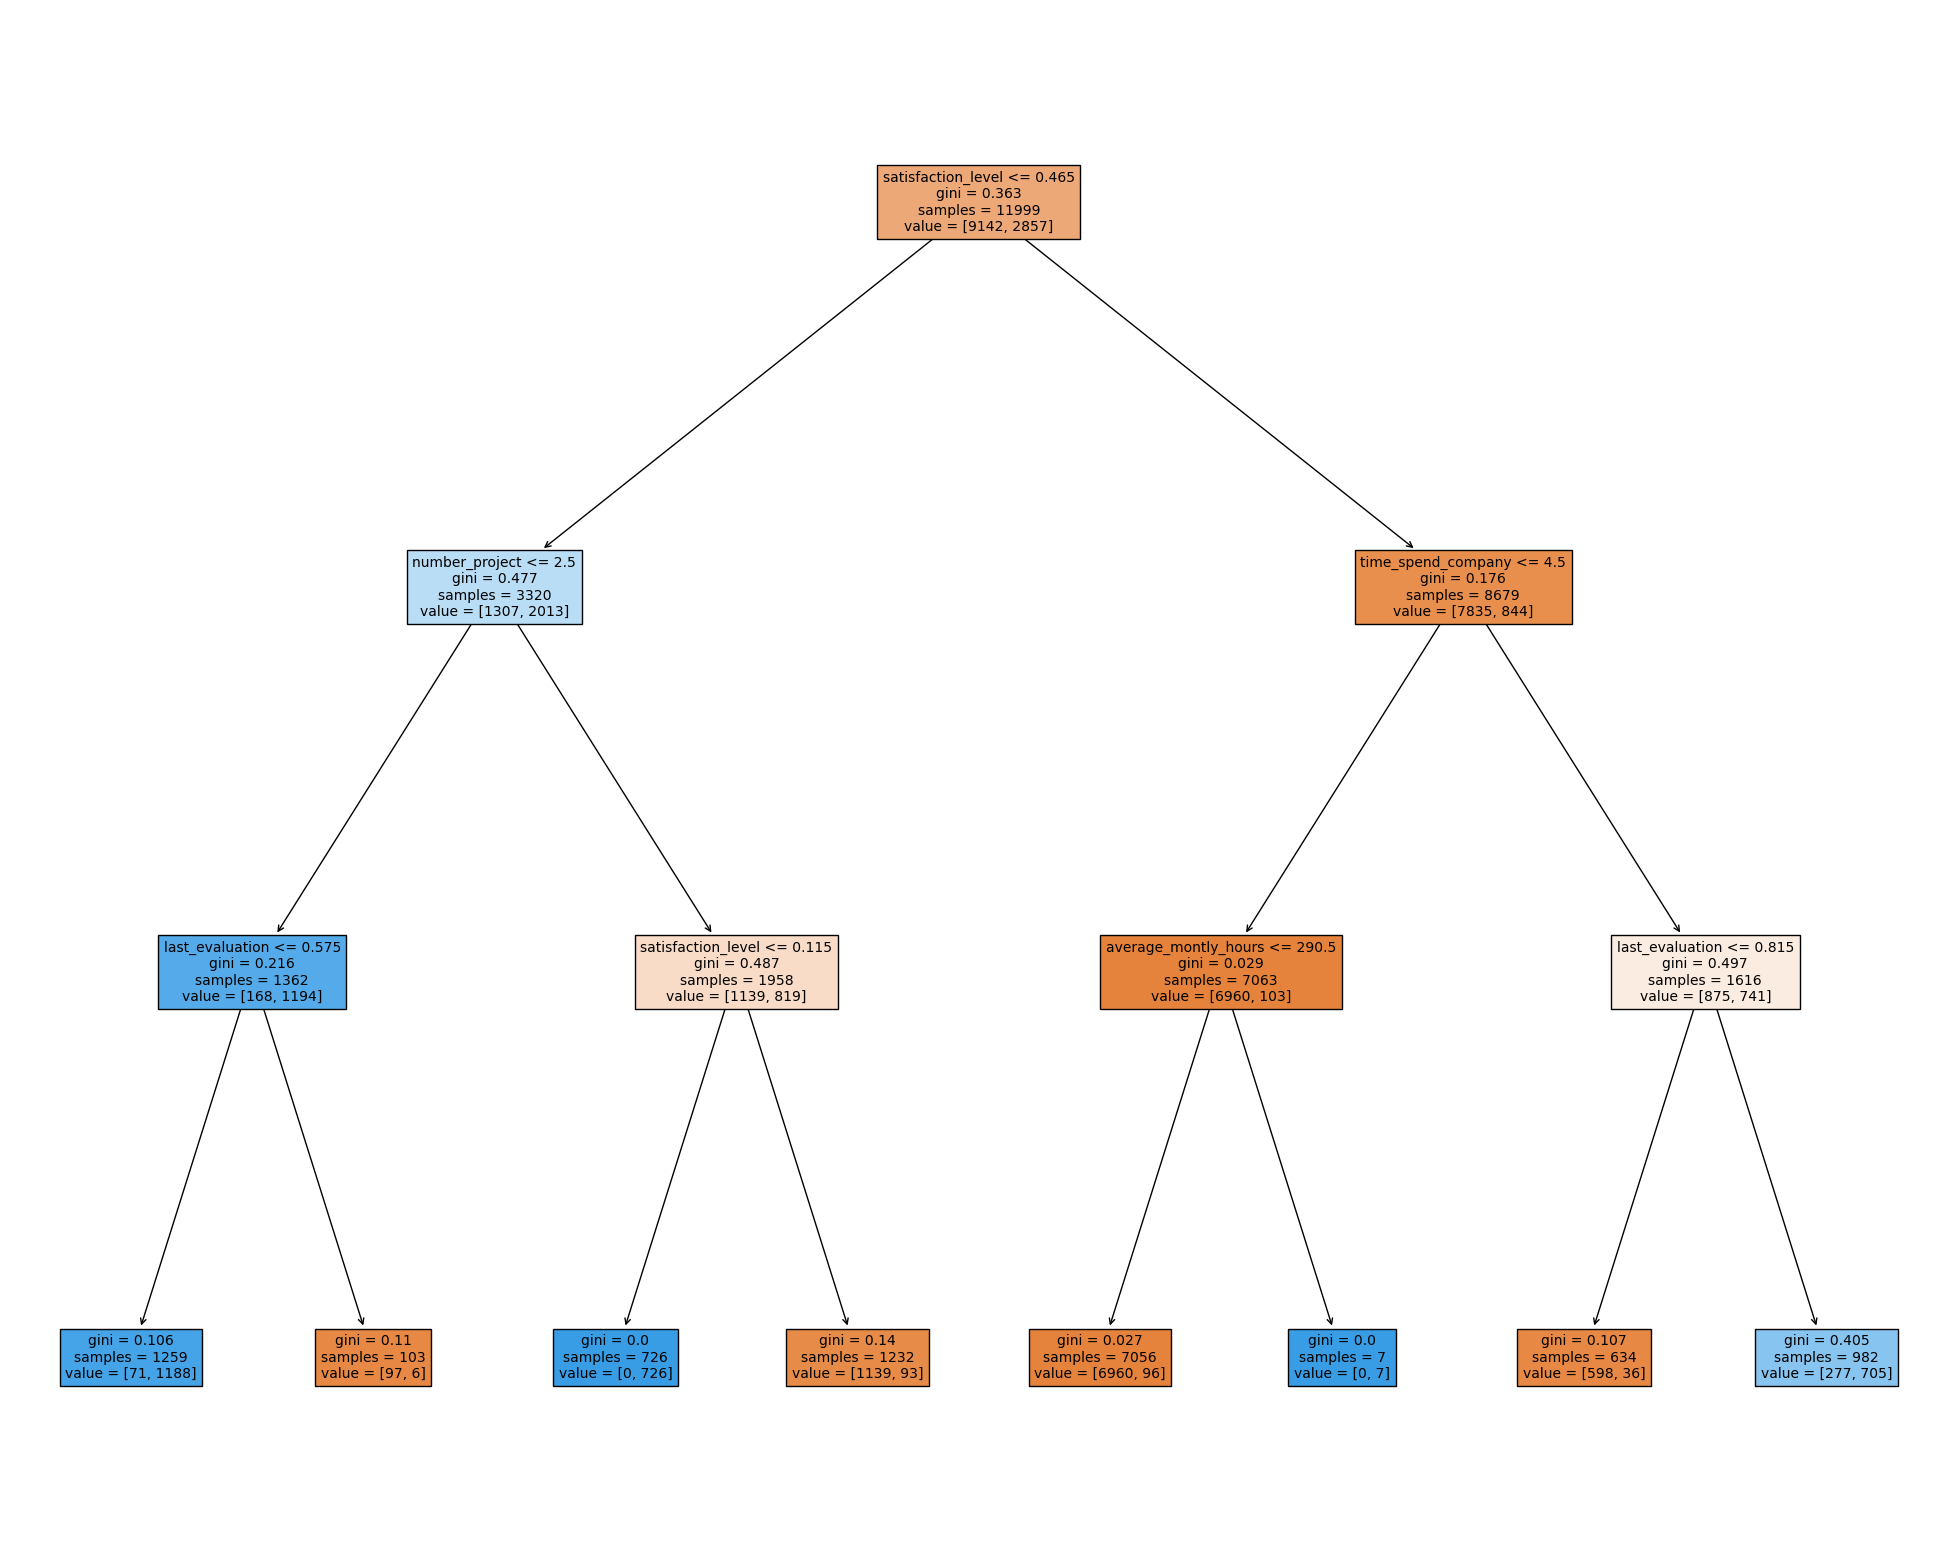

In [18]:
## Inputs and target ##
X = turnover.drop(columns = ['left'], axis = 1)
Y = turnover['left']

## Split Data ##
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, stratify = Y)

## decision tree ##
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X_train, Y_train)

fig = plt.figure(figsize = (25, 20))
plot_tree(tree_md, feature_names = X_train.columns, filled = True)

We can make 3 features from the given decision trees. 

In [22]:
## Feature Engineering ##
turnover['interaction_1'] = np.where((turnover['satisfaction_level'] >= .115) &
                                     (turnover['satisfaction_level'] <= .465) &
                                     (turnover['number_project'] > 2.5), 1, 0)

turnover['interaction_2'] = np.where((turnover['satisfaction_level'] >= .465) &
                                     (turnover['number_project'] <= 2.5) &
                                     (turnover['last_evaluation'] <= .575), 1, 0)

turnover['interaction_3'] = np.where((turnover['satisfaction_level'] >= .465) &
                                     (turnover['time_spend_company'] <= 4.5) &
                                     (turnover['number_project'] <= 290.5), 1, 0)

turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,interaction_1,interaction_2,interaction_3
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
